#CHE-1148, Assignment-2

##Feature Engineering

Here, you are going to create features from a very simple dataset: retail transaction data from Kaggle. The dataset provides the customer ID, date of the transaction and transaction amount as shown in the table below. Although this may look like a very simple dataset, you will build a wide range of features0. The features will then be used as inputs in several models in upcoming assignments, in which you will try to predict the client’s response to a promotion campaign.

### 1.1 Import the data and create the anchor date columns

**1. Import the dataset as txn and identify the number of rows.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer
from pyspark.sql.window import Window
import pyspark.sql.functions as F
from pyspark.sql.functions import date_format


In [0]:
#Importing the data as txn
# File location and type
file_location = "/FileStore/tables/Retail_Data_Transactions-1.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
txn = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(txn)

customer_id,trans_date,tran_amount
CS5295,11-Feb-13,35
CS4768,15-Mar-15,39
CS2122,26-Feb-13,52
CS1217,16-Nov-11,99
CS1850,20-Nov-13,78
CS5539,26-Mar-14,81
CS2724,06-Feb-12,93
CS5902,30-Jan-15,89
CS6040,08-Jan-13,76
CS3802,20-Aug-13,75


In [0]:
# checking if txn is pyspark dataframe or not
print(isinstance(txn, DataFrame))

True


In [0]:
#idenitfying number of rows
print(f"Number of rows in dataframe txn is : {txn.count()}")

Number of rows in dataframe txn is : 125000


**2. The date-format in column ’trans date’ is not standard. Create a new column ’txn date’
from ’trans date’ with pd.to datetime and drop the column ’trans date’.**

In [0]:
txn = txn.withColumn('txn_date', to_timestamp("trans_date", "dd-MMM-yy"))
txn = txn.drop(col("trans_date"))
txn.show()

+-----------+-----------+-------------------+
|customer_id|tran_amount|           txn_date|
+-----------+-----------+-------------------+
|     CS5295|         35|2013-02-11 00:00:00|
|     CS4768|         39|2015-03-15 00:00:00|
|     CS2122|         52|2013-02-26 00:00:00|
|     CS1217|         99|2011-11-16 00:00:00|
|     CS1850|         78|2013-11-20 00:00:00|
|     CS5539|         81|2014-03-26 00:00:00|
|     CS2724|         93|2012-02-06 00:00:00|
|     CS5902|         89|2015-01-30 00:00:00|
|     CS6040|         76|2013-01-08 00:00:00|
|     CS3802|         75|2013-08-20 00:00:00|
|     CS3494|         94|2013-07-02 00:00:00|
|     CS3780|         80|2013-03-25 00:00:00|
|     CS1171|         59|2012-11-03 00:00:00|
|     CS2892|         43|2013-05-12 00:00:00|
|     CS5552|         78|2014-12-29 00:00:00|
|     CS6043|         98|2014-01-15 00:00:00|
|     CS4147|         81|2013-07-08 00:00:00|
|     CS4655|         93|2013-12-30 00:00:00|
|     CS3904|        103|2014-07-2

**3. Identify the min() and max() of column ’txn date’.**

In [0]:
#minimum date
txn.select(min('txn_date')).show()

+-------------------+
|      min(txn_date)|
+-------------------+
|2011-05-16 00:00:00|
+-------------------+



In [0]:
#maximum date
txn.select(max('txn_date')).show()

+-------------------+
|      max(txn_date)|
+-------------------+
|2015-03-16 00:00:00|
+-------------------+



**4. Create the column ’ME DT’: the last day of the month in the ’trans date’ column. DateOffset objects is a simple way to do this in pandas.**

In [0]:
txn = txn.withColumn('ME_DT', last_day('txn_date'))

**5. Create the column ’YEAR’: the year in the ’trans date’ column. DatetimeIndex with attribute .year will help you do so.**

In [0]:
txn = txn.withColumn('YEAR',year('txn_date'))

In [0]:
txn.show() #Final txn dataframe

+-----------+-----------+-------------------+----------+----+
|customer_id|tran_amount|           txn_date|     ME_DT|YEAR|
+-----------+-----------+-------------------+----------+----+
|     CS5295|         35|2013-02-11 00:00:00|2013-02-28|2013|
|     CS4768|         39|2015-03-15 00:00:00|2015-03-31|2015|
|     CS2122|         52|2013-02-26 00:00:00|2013-02-28|2013|
|     CS1217|         99|2011-11-16 00:00:00|2011-11-30|2011|
|     CS1850|         78|2013-11-20 00:00:00|2013-11-30|2013|
|     CS5539|         81|2014-03-26 00:00:00|2014-03-31|2014|
|     CS2724|         93|2012-02-06 00:00:00|2012-02-29|2012|
|     CS5902|         89|2015-01-30 00:00:00|2015-01-31|2015|
|     CS6040|         76|2013-01-08 00:00:00|2013-01-31|2013|
|     CS3802|         75|2013-08-20 00:00:00|2013-08-31|2013|
|     CS3494|         94|2013-07-02 00:00:00|2013-07-31|2013|
|     CS3780|         80|2013-03-25 00:00:00|2013-03-31|2013|
|     CS1171|         59|2012-11-03 00:00:00|2012-11-30|2012|
|     CS

### 1.2 Create features that capture annual spending

**1. Using groupby and NamedAgg create clnt_annual_aggregations, the annual aggregations dataframe: with sum, mean, std, var, sem, max, min, count as the aggregation functions. A snapshot of the output table is shown below. Notice that the output is a typical MultiIndex pandas dataframe.**

In [0]:
#sum, mean, std, var, "sem," max, min, count in pyspark
clnt_annual_aggregations = txn.groupBy(["customer_id","YEAR"]).agg(sum("tran_amount").alias("ann_txn_amt_sum"),\
                                                                   avg("tran_amount").alias("ann_txn_amt_ave"),\
                                                                   stddev("tran_amount").alias("ann_txn_amt_std"),\
                                                                   variance("tran_amount").alias("ann_txn_amt_var"),\
                                                                   (stddev("tran_amount") / sqrt(count("tran_amount"))).alias("ann_txn_amt_sem"),\
                                                                   max("tran_amount").alias("ann_txn_amt_max"),\
                                                                   min("tran_amount").alias("ann_txn_amt_min"),\
                                                                   count("tran_amount").alias("ann_txn_amt_cnt"))

clnt_annual_aggregations.show()

+-----------+----+---------------+------------------+------------------+------------------+------------------+---------------+---------------+---------------+
|customer_id|YEAR|ann_txn_amt_sum|   ann_txn_amt_ave|   ann_txn_amt_std|   ann_txn_amt_var|   ann_txn_amt_sem|ann_txn_amt_max|ann_txn_amt_min|ann_txn_amt_cnt|
+-----------+----+---------------+------------------+------------------+------------------+------------------+---------------+---------------+---------------+
|     CS1770|2012|            731|              73.1|14.790762883187153| 218.7666666666667| 4.677249904235038|             89|             42|             10|
|     CS2231|2015|            162|              81.0| 9.899494936611665|              98.0| 6.999999999999999|             88|             74|              2|
|     CS3336|2012|            560|              70.0| 18.81488772222678|             354.0| 6.652067347825034|            102|             50|              8|
|     CS6034|2013|            467| 66.71428571

In [0]:
clnt_annual_aggregations = clnt_annual_aggregations.orderBy(['customer_id','YEAR'],ascending=True)
clnt_annual_aggregations.show()

+-----------+----+---------------+-----------------+------------------+------------------+------------------+---------------+---------------+---------------+
|customer_id|YEAR|ann_txn_amt_sum|  ann_txn_amt_ave|   ann_txn_amt_std|   ann_txn_amt_var|   ann_txn_amt_sem|ann_txn_amt_max|ann_txn_amt_min|ann_txn_amt_cnt|
+-----------+----+---------------+-----------------+------------------+------------------+------------------+---------------+---------------+---------------+
|     CS1112|2011|            212|70.66666666666667| 22.03028218914441|485.33333333333337|12.719189352225943|             96|             56|              3|
|     CS1112|2012|            337|             67.4|12.720062892926277|             161.8| 5.688585061331157|             81|             52|              5|
|     CS1112|2013|            212|70.66666666666667| 34.50120770833006|1190.3333333333333| 19.91928155777155|            105|             36|              3|
|     CS1112|2014|            212|70.66666666666667|

Here we don't see the multi-index unlike pandas dataframe since spark dataframes do not create a by-default index. Hence we move forward with this sorted aggregated dataframe that contains customer ID in ascending order.

**2. Plot the histogram of the sum and count.**

Here I first convert spark dataframe to pandas dataframe to access the columns to plot using matplotlib library.

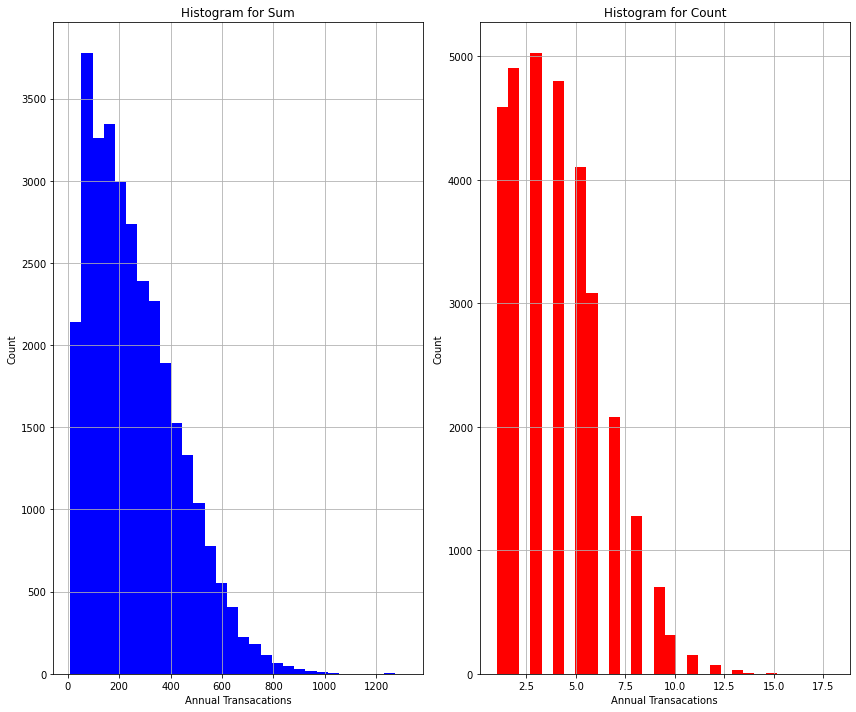

In [0]:
annual_df_pandas = clnt_annual_aggregations.toPandas()


fig, axs = plt.subplots(1, 2,tight_layout=True, figsize=(12,10))

axs[0].hist(annual_df_pandas["ann_txn_amt_sum"], bins=30, color='blue')
axs[0].set_title("Histogram for Sum")
axs[0].set_xlabel("Annual Transacations")
axs[0].set_ylabel("Count")
axs[0].grid()

axs[1].hist(annual_df_pandas["ann_txn_amt_cnt"], bins=30, color='red')
axs[1].set_title("Histogram for Count")
axs[1].set_xlabel("Annual Transacations")
axs[1].set_ylabel("Count")
axs[1].grid()





**3. Reset the index and reshape the table with the pivot_table function to create the
clnt annual aggregations pivot table shown below with 40 columns (why 40?).** 

**4. The pivoted object you created is a MultiIndex object with hierarchical indexes. You can see the first level (i.e. 0) in the snapshot above with names ’ann txn amt ave’, ’ann txn amt max’ (and more as indicated by the ...) and the second level (i.e. 1) with names ’2011’, ’2012’, etc. You can confirm the multiple levels of the columns with the following two expressions.
What are your observations regarding the number of levels and the column names?**

**5. Finally, you want to save the dataframe clnt annual aggregations pivot as an .xlsx file for future use in the machine learning assignment. To do so, you want to remove the two levels in columns and create a single level with column names: ’ann txn amt ave 2011’, ’ann txn amt ave 2012’, etc. To do so, use the code snippet below prior to saving the dataframe as an Excel file.**

Tasks from question-3 to question-5 are done in a single code below. The analysis for each of the question is explained in spark context.

**Resetting index is not applicable here** since there are no index in spark dataframes. So we proceed to form pivot table from the sorted spark dataframe.

In [0]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.groupby("customer_id").pivot("year").agg(first("ann_txn_amt_sum").alias("ann_txn_amt_sum"), \
                                                                                                  first("ann_txn_amt_ave").alias("ann_txn_amt_ave"),\
                                                                                                    first("ann_txn_amt_std").alias("ann_txn_amt_std"),\
                                                                                                   first("ann_txn_amt_var").alias("ann_txn_amt_var"),\
                                                                                                   first("ann_txn_amt_sem").alias("ann_txn_amt_sem"),\
                                                                                                    first("ann_txn_amt_max").alias("ann_txn_amt_max"),\
                                                                                                     first("ann_txn_amt_min").alias("ann_txn_amt_min"),\
                                                                                                    first("ann_txn_amt_cnt").alias("ann_txn_amt_cnt")).na.fill(0)
                                                                                                  

clnt_annual_aggregations_pivot.display() #final required pivot table

customer_id,2011_ann_txn_amt_sum,2011_ann_txn_amt_ave,2011_ann_txn_amt_std,2011_ann_txn_amt_var,2011_ann_txn_amt_sem,2011_ann_txn_amt_max,2011_ann_txn_amt_min,2011_ann_txn_amt_cnt,2012_ann_txn_amt_sum,2012_ann_txn_amt_ave,2012_ann_txn_amt_std,2012_ann_txn_amt_var,2012_ann_txn_amt_sem,2012_ann_txn_amt_max,2012_ann_txn_amt_min,2012_ann_txn_amt_cnt,2013_ann_txn_amt_sum,2013_ann_txn_amt_ave,2013_ann_txn_amt_std,2013_ann_txn_amt_var,2013_ann_txn_amt_sem,2013_ann_txn_amt_max,2013_ann_txn_amt_min,2013_ann_txn_amt_cnt,2014_ann_txn_amt_sum,2014_ann_txn_amt_ave,2014_ann_txn_amt_std,2014_ann_txn_amt_var,2014_ann_txn_amt_sem,2014_ann_txn_amt_max,2014_ann_txn_amt_min,2014_ann_txn_amt_cnt,2015_ann_txn_amt_sum,2015_ann_txn_amt_ave,2015_ann_txn_amt_std,2015_ann_txn_amt_var,2015_ann_txn_amt_sem,2015_ann_txn_amt_max,2015_ann_txn_amt_min,2015_ann_txn_amt_cnt
CS1664,244,81.33333333333333,14.433756729740644,208.33333333333331,8.333333333333334,98,73,3,846,76.9090909090909,18.50110561806805,342.29090909090917,5.578293231078914,105,49,11,339,84.75,16.235249715767644,263.5833333333333,8.117624857883822,100,64,4,374,74.8,21.323695739716413,454.7,9.536246641105713,97,40,5,151,75.5,16.263455967290593,264.5,11.5,87,64,2
CS1802,143,71.5,31.81980515339464,1012.5,22.5,94,49,2,314,78.5,6.454972243679028,41.666666666666664,3.227486121839514,86,71,4,807,80.7,22.101030644645412,488.4555555555556,6.988959547425893,104,35,10,223,55.75,16.194134740701646,262.25,8.097067370350823,72,39,4,426,60.857142857142854,19.709799351494947,388.4761904761906,7.449603925005396,96,35,7
CS2282,185,61.666666666666664,30.74627348693388,945.3333333333333,17.75136927425913,97,41,3,248,62.0,25.468935326524086,648.6666666666666,12.734467663262043,92,35,4,516,73.71428571428571,13.524228699070491,182.90476190476193,5.111677973100445,97,59,7,424,70.66666666666667,18.790068298616337,353.06666666666666,7.671013260609347,91,43,6,79,79.0,0.0,0.0,0.0,79,79,1
CS2412,68,68.0,0.0,0.0,0.0,68,68,1,392,78.4,23.15815191244759,536.3,10.356640381899913,102,50,5,89,44.5,3.5355339059327378,12.5,2.5,47,42,2,480,68.57142857142857,14.081396034687552,198.2857142857143,5.322267431484902,86,42,7,55,55.0,0.0,0.0,0.0,55,55,1
CS2754,185,61.666666666666664,26.025628394590846,677.3333333333334,15.025903559446194,87,35,3,275,68.75,23.128265535198842,534.9166666666666,11.564132767599421,101,46,4,544,68.0,20.632844828435214,425.7142857142857,7.2948122466781635,102,39,8,545,90.83333333333333,10.361788777362076,107.36666666666665,4.230182554505709,104,74,6,89,89.0,0.0,0.0,0.0,89,89,1
CS2757,350,70.0,26.201145013147805,686.5,11.717508267545622,100,42,5,331,66.2,24.345430782797827,592.7,10.88760763437037,101,35,5,451,64.42857142857143,19.10372688645807,364.95238095238096,7.220530065152329,93,37,7,311,77.75,27.536339626028727,758.25,13.768169813014364,102,45,4,83,83.0,0.0,0.0,0.0,83,83,1
CS2811,236,59.0,26.166135875720485,684.6666666666666,13.083067937860243,96,40,4,330,82.5,11.387127235025815,129.66666666666666,5.693563617512908,96,69,4,270,67.5,27.380041392712805,749.6666666666666,13.690020696356402,95,42,4,274,54.8,10.329569206893384,106.69999999999999,4.619523784980439,68,41,5,0,0.0,0.0,0.0,0.0,0,0,0
CS3083,233,58.25,22.911059920192837,524.9166666666666,11.455529960096419,85,35,4,272,68.0,24.61706725018234,606.0,12.30853362509117,91,38,4,239,59.75,24.67623688220444,608.9166666666666,12.33811844110222,93,41,4,283,70.75,18.83923211457056,354.91666666666674,9.41961605728528,94,49,4,42,42.0,0.0,0.0,0.0,42,42,1
CS3128,170,85.0,8.48528137423857,72.0,5.999999999999999,91,79,2,271,67.75,27.83732506306356,774.9166666666666,13.91866253153178,100,37,4,553,61.44444444444444,17.321309932501578,300.02777777777777,5.773769977500526,88,38,9,478,59.75,16.429503079173497,269.92857142857144,5.808706519404421,91,35,8,0,0.0,0.0,0.0,0.0,0,0,0
CS3155,391,78.2,26.752569970004753,715.7,11.964113005150027,105,43,5,503,71.85714285714286,13.107613200332231,171.80952380952377,4.9542121156723615,90,49,7,720,80.0,21.1482859825566,447.25,7.0494286608

**NaN values are replaced with 0s** because the null values represent absence of transaction data for that customer on that particular day. Replacing it with anything else like mean or median would be an assumption on the transaction amount which may not be accurate. So it's safe to assume that there was no transacations that day and hence 0 is replaced for imputation.

In [0]:
#Number of columns
print(f"Number of columns if the pivot table is:{len(clnt_annual_aggregations_pivot.columns)}")

Number of columns if the pivot table is:41


Since the pandas dataframe considered customer_id as index, it did not count it as columns and hence the question reasoned to have 40 columns. But here spark considers customer_id as another column and hence there are 41 columns.\
**To answer the question about why there will be 40 columns**:  We'll have 40 columns because we have 8 features each of which has a value in the 5 years from 2011 to 2015. So there will be 8X5 = 40 columns to capture all data entries.

**My observations regarding the number of levels and columns in the pivot table**:\
We observe that the rows get randomly shuffled by spark. In this case unlike pandas, we do not see different levels created by the code. Spark takes the "year" names automatically as prefix to our assigned column names in the pivot table.

In [0]:
#saving to csv file as pyspark doesn't have direct code to save as excel file
clnt_annual_aggregations_pivot.write.csv('annual_features_spark.csv')


**6. What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?**

Possible disadvantages of this table is that it only provides overview of overall transcations annually. We may not accurately analyze the transaction behaviour of each client based on the annual behaviour. We can dive into deppere aspects like monthly behaviour or weekly behaviour.

### 1.3 Create monthly aggregations

**1. Create the dataframe that captures the monthly sum and count of transactions per client (name it clnt_monthly_aggregations). Use the groupby function with the Named Aggregation feature which was introduced in pandas version 0.25.0. Make sure that you name the columns as shown in the figure sample on the right.**

In [0]:
clnt_monthly_aggregations = txn.groupBy(["customer_id","ME_DT"]).agg(sum("tran_amount").alias("mth_txn_amt_sum"),\
                                                                   count("tran_amount").alias("mth_txn_cnt"))                                                                                                 
clnt_monthly_aggregations.display()

customer_id,ME_DT,mth_txn_amt_sum,mth_txn_cnt
CS2724,2012-02-29,93,1
CS5201,2011-07-31,152,2
CS4681,2014-02-28,96,1
CS3182,2013-01-31,148,2
CS1492,2011-09-30,101,1
CS2699,2013-11-30,64,1
CS3758,2014-04-30,55,1
CS5181,2012-04-30,96,1
CS5185,2011-05-31,56,1
CS4278,2013-08-31,99,2


Once again we observe and understand that spark shuffles the rows.

**2. Create a histogram of both columns you created. What are your observations? What are the most common and maximum values for each column? How do they compare with the ones in section 1.2?**


Here once again we convert spark dataframe to pandas dataframe to visulaize it using matplotlib library.

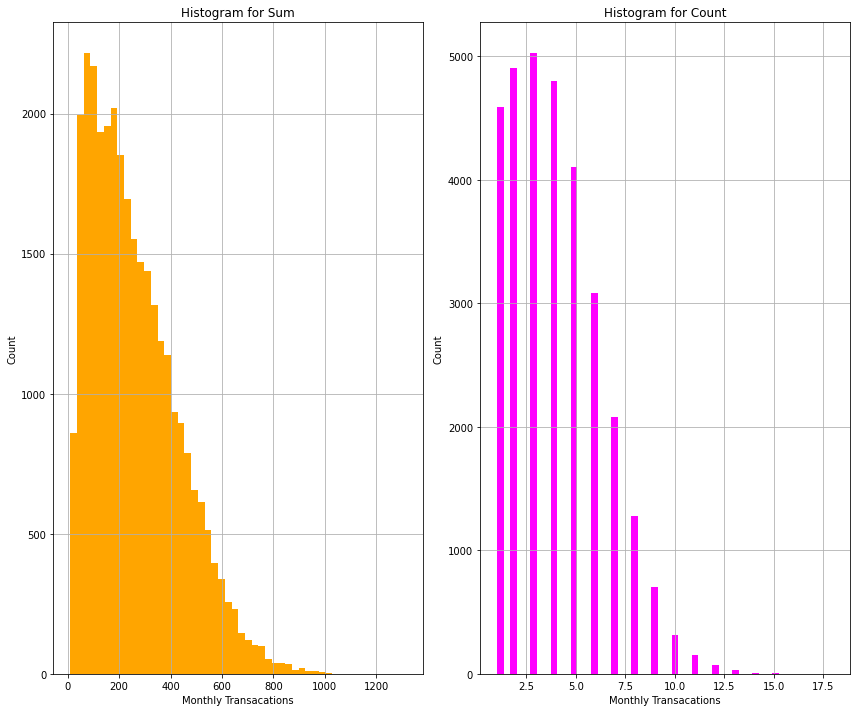

In [0]:
monthly_df_pandas = clnt_monthly_aggregations.toPandas()


fig1, axs1 = plt.subplots(1, 2,tight_layout=True, figsize=(12,10))

axs1[0].hist(annual_df_pandas["ann_txn_amt_sum"], bins=50, color='orange')
axs1[0].set_title("Histogram for Sum")
axs1[0].set_xlabel("Monthly Transacations")
axs1[0].set_ylabel("Count")
axs1[0].grid()

axs1[1].hist(annual_df_pandas["ann_txn_amt_cnt"], bins=50, color='magenta')
axs1[1].set_title("Histogram for Count")
axs1[1].set_xlabel("Monthly Transacations")
axs1[1].set_ylabel("Count")
axs1[1].grid()

**Observations and comparisions**:

The maximum and most common value for mth_txn_amt_sum is around 50-100 dollars while it was around 100-200 dollars for annual histogram (section 1.2).
Similarly, here the monthly maximum and most common number of transactions is mostly between 2-3 which looks similar for annual histogram as well

In [0]:
#To confirm the snapshot for ID CS112
clnt_monthly_aggregations = clnt_monthly_aggregations.orderBy(['customer_id','ME_DT'],ascending=True)
clnt_monthly_aggregations.filter("customer_id == 'CS1112'").show()

+-----------+----------+---------------+-----------+
|customer_id|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-----------+----------+---------------+-----------+
|     CS1112|2011-06-30|             56|          1|
|     CS1112|2011-08-31|             96|          1|
|     CS1112|2011-10-31|             60|          1|
|     CS1112|2012-04-30|             56|          1|
|     CS1112|2012-06-30|             52|          1|
|     CS1112|2012-07-31|             81|          1|
|     CS1112|2012-09-30|             72|          1|
|     CS1112|2012-12-31|             76|          1|
|     CS1112|2013-03-31|            105|          1|
|     CS1112|2013-07-31|             36|          1|
|     CS1112|2013-11-30|             71|          1|
|     CS1112|2014-04-30|             63|          1|
|     CS1112|2014-07-31|             90|          1|
|     CS1112|2014-12-31|             59|          1|
|     CS1112|2015-01-31|             39|          1|
+-----------+----------+---------------+------

### 1.4 Create the base table for the rolling window features
**1. Create the numpy array of the unique elements in columns ’customer id’ and ’ME DT’ of the txn table you created in section 1.1. Confirm that you have 6,889 unique clients and 47 unique month-end-dates.**

In [0]:
clnt_no = txn.dropDuplicates(["customer_id"]).select("customer_id")
clnt_no.show()

+-----------+
|customer_id|
+-----------+
|     CS6043|
|     CS4147|
|     CS5539|
|     CS1217|
|     CS1171|
|     CS2724|
|     CS3802|
|     CS3780|
|     CS5902|
|     CS3494|
|     CS1850|
|     CS5552|
|     CS4655|
|     CS4768|
|     CS2892|
|     CS3904|
|     CS5295|
|     CS6040|
|     CS2086|
|     CS4102|
+-----------+
only showing top 20 rows



In [0]:
#confirming number of rows
print(f"Number of rows in dataframe clnt_no is : {clnt_no.count()}")

Number of rows in dataframe clnt_no is : 6889


In [0]:
me_dt = txn.dropDuplicates(["ME_DT"]).select("ME_DT")
me_dt.show()

+----------+
|     ME_DT|
+----------+
|2013-03-31|
|2012-01-31|
|2013-05-31|
|2011-07-31|
|2013-02-28|
|2013-12-31|
|2013-04-30|
|2012-02-29|
|2011-11-30|
|2013-08-31|
|2014-12-31|
|2012-11-30|
|2014-07-31|
|2013-01-31|
|2014-01-31|
|2013-11-30|
|2013-07-31|
|2015-03-31|
|2014-03-31|
|2012-03-31|
+----------+
only showing top 20 rows



In [0]:
#confirming number of rows
print(f"Number of rows in dataframe me_dt is : {me_dt.count()}")

Number of rows in dataframe me_dt is : 47


We confirm that there are 47 unique month end dates

Please note that instead of numpy arrays, I created two dataframes that does the same job of storing unique customer ids and month end dates. Additonally, here also spark shuffles the rows of both the dataframes randomly, unlike pandas dataframes where the entries are displayed in ascending order of index

**2.Use itertools.product to generate all the possible combinations of ’customer id’ and ’ME DT’. Itertools is a Python module that iterates over data in a computation- ally efficient way. You can perform the same task with a for-loop, but the execution may be inefficient. For a brief overview of the Itertools module see here. If you named the numpy arrays with the unique elements: clnt no and me dt, then the code below will create an itertools.product object (you can confirm this by running: type(base table)).**

Here instead of using itertools.product, I use cross join function which does the same job of calculating the cartesian product of the entries of both the dataframes. In other words, we create all possible combinations of customer ids and month end dates.

In [0]:
base_table=clnt_no.crossJoin(me_dt)
base_table.show() #desired base table

+-----------+----------+
|customer_id|     ME_DT|
+-----------+----------+
|     CS6043|2013-03-31|
|     CS4147|2013-03-31|
|     CS5539|2013-03-31|
|     CS1217|2013-03-31|
|     CS1171|2013-03-31|
|     CS2724|2013-03-31|
|     CS3802|2013-03-31|
|     CS3780|2013-03-31|
|     CS5902|2013-03-31|
|     CS3494|2013-03-31|
|     CS1850|2013-03-31|
|     CS5552|2013-03-31|
|     CS4655|2013-03-31|
|     CS4768|2013-03-31|
|     CS2892|2013-03-31|
|     CS3904|2013-03-31|
|     CS5295|2013-03-31|
|     CS6040|2013-03-31|
|     CS2086|2013-03-31|
|     CS4102|2013-03-31|
+-----------+----------+
only showing top 20 rows



**3.Next, you want to convert the itertools.product object base table into a pandas object called base_table_pd. To do so, use pd.DataFrame.from_records and name the columns ’CLNT NO’ and ’ME DT’.**

In [0]:
base_table #to see type

Out[441]: DataFrame[customer_id: string, ME_DT: date]

Here we see our base table is already a spark dataframe.

In [0]:
#renaming columns and renaming dataframe as base_table_pd
base_table_pd = base_table.withColumnRenamed("customer_id","CLNT_NO")

In [0]:
base_table_pd.show()

+-------+----------+
|CLNT_NO|     ME_DT|
+-------+----------+
| CS6043|2013-03-31|
| CS4147|2013-03-31|
| CS5539|2013-03-31|
| CS1217|2013-03-31|
| CS1171|2013-03-31|
| CS2724|2013-03-31|
| CS3802|2013-03-31|
| CS3780|2013-03-31|
| CS5902|2013-03-31|
| CS3494|2013-03-31|
| CS1850|2013-03-31|
| CS5552|2013-03-31|
| CS4655|2013-03-31|
| CS4768|2013-03-31|
| CS2892|2013-03-31|
| CS3904|2013-03-31|
| CS5295|2013-03-31|
| CS6040|2013-03-31|
| CS2086|2013-03-31|
| CS4102|2013-03-31|
+-------+----------+
only showing top 20 rows



We rename the "customer_id" column as "CLNT_NO". The second column name is already "ME_DT"

**4. Finally, you want to validate that you created the table you originally wanted. There are two checks you want to perform:**

**a) Filter client CS1112 and confirm that the dates fall between the min and max month-dates you identified in section 1.1. Also, confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.**

In [0]:
cs1112_df=base_table_pd.filter(base_table_pd["CLNT_NO"] == "CS1112")
cs1112_df.show(truncate=False)

+-------+----------+
|CLNT_NO|ME_DT     |
+-------+----------+
|CS1112 |2013-03-31|
|CS1112 |2012-01-31|
|CS1112 |2013-05-31|
|CS1112 |2011-07-31|
|CS1112 |2013-02-28|
|CS1112 |2013-12-31|
|CS1112 |2013-04-30|
|CS1112 |2012-02-29|
|CS1112 |2011-11-30|
|CS1112 |2013-08-31|
|CS1112 |2014-12-31|
|CS1112 |2012-11-30|
|CS1112 |2014-07-31|
|CS1112 |2013-01-31|
|CS1112 |2014-01-31|
|CS1112 |2013-11-30|
|CS1112 |2013-07-31|
|CS1112 |2015-03-31|
|CS1112 |2014-03-31|
|CS1112 |2012-03-31|
+-------+----------+
only showing top 20 rows



In [0]:
print(f"Number of rows in the base table for CS1112 customers is {cs1112_df.count()}")

Number of rows in the base table for CS1112 customers is 47


We confirm that the snapshot of client CS1112 has 47 rows, one for each month in the dataset.

In [0]:
cs1112_df.select(min("ME_DT"),max("ME_DT")).show()

+----------+----------+
|min(ME_DT)|max(ME_DT)|
+----------+----------+
|2011-05-31|2015-03-31|
+----------+----------+



From above results we can see the minimum date for CS1112 customer is 31st May 2015 which is later than the minimum date we identified in section 1.1 i.e. 16th May 2011.
Similarly, the maximum date for customer id CS1112 is 31st March 2015 which is after 16th March 2015.

**b) Confirm that the base table pd has 323,783 rows, which is the expected value of combinations for 6,889 unique clients and 47 unique month-end dates.**

In [0]:
print(f"The number of rows base_table_pd has is {base_table_pd.count()}")

The number of rows base_table_pd has is 323783


Hence, it is confirmed that the base_table_pd has 323783 rows.

Therefore we validate that I created the table we originally wanted by both the methods.

### 1.5 Create the monthly rolling window features

**1. Left-join the base table pd with the clnt monthly aggregations table from section 1.3 on [CLNT NO, ME DT] to create the table base clnt mth. Comment on the following questions in Markdown:**

In [0]:
#renaming cuatomer id column for monthly table
clnt_monthly_aggregations = clnt_monthly_aggregations.withColumnRenamed("customer_id","CLNT_NO")
clnt_monthly_aggregations.show()

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS1112|2011-06-30|             56|          1|
| CS1112|2011-08-31|             96|          1|
| CS1112|2011-10-31|             60|          1|
| CS1112|2012-04-30|             56|          1|
| CS1112|2012-06-30|             52|          1|
| CS1112|2012-07-31|             81|          1|
| CS1112|2012-09-30|             72|          1|
| CS1112|2012-12-31|             76|          1|
| CS1112|2013-03-31|            105|          1|
| CS1112|2013-07-31|             36|          1|
| CS1112|2013-11-30|             71|          1|
| CS1112|2014-04-30|             63|          1|
| CS1112|2014-07-31|             90|          1|
| CS1112|2014-12-31|             59|          1|
| CS1112|2015-01-31|             39|          1|
| CS1113|2011-05-31|             94|          1|
| CS1113|2011-07-31|             57|          1|
| CS1113|2011-10-31|

In [0]:
#Left outer join of the tables
base_clnt_mth = base_table_pd.join(clnt_monthly_aggregations, ["CLNT_NO","ME_DT"], "left_outer")
base_clnt_mth.show()

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS6043|2013-03-31|           null|       null|
| CS4147|2013-03-31|             82|          1|
| CS5539|2013-03-31|           null|       null|
| CS1217|2013-03-31|           null|       null|
| CS1171|2013-03-31|           null|       null|
| CS2724|2013-03-31|           null|       null|
| CS3802|2013-03-31|           null|       null|
| CS3780|2013-03-31|             80|          1|
| CS5902|2013-03-31|             45|          1|
| CS3494|2013-03-31|           null|       null|
| CS1850|2013-03-31|            119|          2|
| CS5552|2013-03-31|           null|       null|
| CS4655|2013-03-31|           null|       null|
| CS4768|2013-03-31|             78|          2|
| CS2892|2013-03-31|           null|       null|
| CS3904|2013-03-31|           null|       null|
| CS5295|2013-03-31|             98|          1|
| CS6040|2013-03-31|

a) Why do some rows have NaN values?

All the non-matching rows of the base_table_pd dataframe contains NaN when compared to the columns in the clnt_monthly_aggregation dataframe. It is simply a combination of inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.

b) What values will you choose to impute NaN values in the sum and count columns?
Perform the imputation you suggest.

**Sum Column**

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[450]: Text(0.5, 1.0, 'Distribution of sum of monthly transcations')

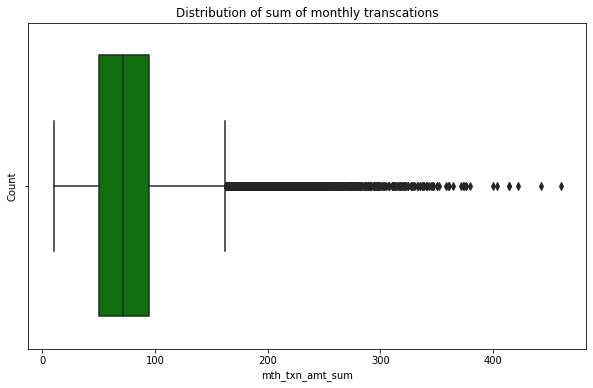

In [0]:
#creating a temporary pandas dataframe to visualize using matplotlib plots
temp_df = base_clnt_mth.toPandas()

fig2,ax2 = plt. subplots (figsize=(10, 6))
sns.boxplot (temp_df["mth_txn_amt_sum"], color='green')
ax2.set_ylabel("Count")
ax2.set_title("Distribution of sum of monthly transcations")

Out[451]: Text(0.5, 1.0, 'Distribution of sum of monthly transcations')

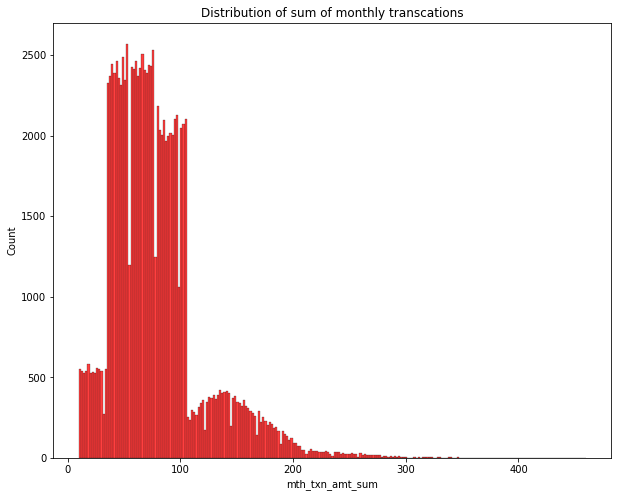

In [0]:
fig3, ax3 = plt. subplots (figsize=(10, 8) )
sns.histplot(temp_df["mth_txn_amt_sum"],color='red')
ax3.set_title("Distribution of sum of monthly transcations")

We observe from the box plot of the column "mth_txn_amt_sum" data that there lies many outliers in the data. We also confirm it again by plotting the distribution of the data for column where we observe it is right-skewed and has a fat tail towards right . Hence, it may not be the best idea to replace the missing sum values with mean of the rest of the column data as there are many outliers. So best approach is to replace the missing values with median of the data since it will be less sensitive to those outliers and mitigate the effect of the outliers.

**Count Column**

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[452]: Text(0.5, 1.0, 'Distribution of count of monthly transcations')

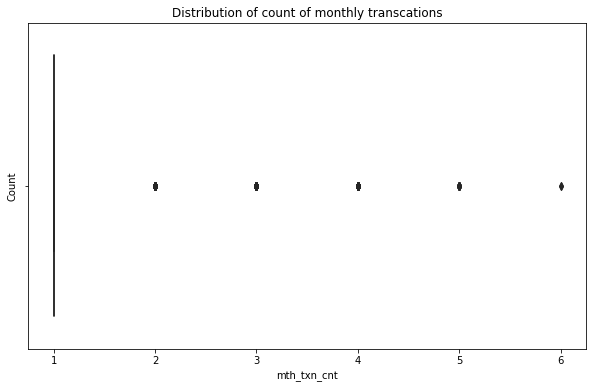

In [0]:
fig4,ax4 = plt. subplots (figsize=(10, 6))
sns.boxplot (temp_df["mth_txn_cnt"], color='green')
ax4.set_ylabel("Count")
ax4.set_title("Distribution of count of monthly transcations")

Out[453]: Text(0.5, 1.0, 'Distribution of count of monthly transcations')

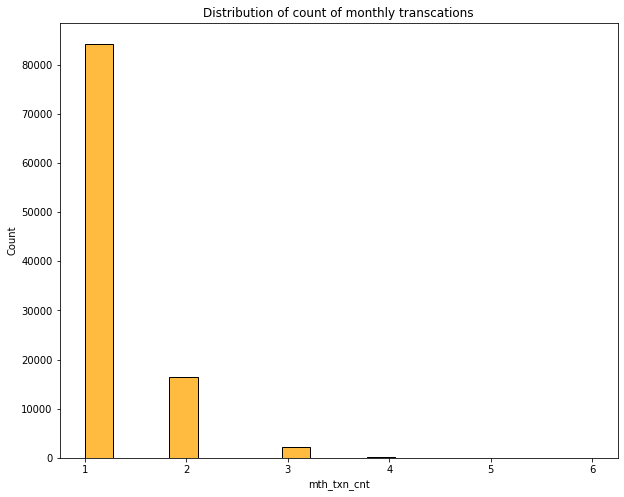

In [0]:
fig5, ax5 = plt. subplots (figsize=(10, 8) )
sns.histplot(temp_df["mth_txn_cnt"],color='orange')
ax5.set_title("Distribution of count of monthly transcations")

Here also the data distribution has many outliers and the distribution is skewed. So we'll go with median of the data for imputation with same reasoning as above for sum columns.

In [0]:
#Imputing missing values with median of the column values
imputecols = ["mth_txn_amt_sum","mth_txn_cnt"]
imputer = Imputer(
    inputCols=imputecols, 
    outputCols=["{}_imputed".format(c) for c in imputecols]
    ).setStrategy("median")

base_clnt_mth = imputer.fit(base_clnt_mth).transform(base_clnt_mth)
base_clnt_mth.show()

+-------+----------+---------------+-----------+-----------------------+-------------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|mth_txn_amt_sum_imputed|mth_txn_cnt_imputed|
+-------+----------+---------------+-----------+-----------------------+-------------------+
| CS6043|2013-03-31|           null|       null|                     72|                  1|
| CS4147|2013-03-31|             82|          1|                     82|                  1|
| CS5539|2013-03-31|           null|       null|                     72|                  1|
| CS1217|2013-03-31|           null|       null|                     72|                  1|
| CS1171|2013-03-31|           null|       null|                     72|                  1|
| CS2724|2013-03-31|           null|       null|                     72|                  1|
| CS3802|2013-03-31|           null|       null|                     72|                  1|
| CS3780|2013-03-31|             80|          1|                     8

We perform imputation on the sum and count column and spark creates two new columns with the imputed values. We drop the orginal two columns and name the new columns as "mth_txn_amt_sum" and "mth_txn_cnt"

In [0]:
#dropping original columns
base_clnt_mth = base_clnt_mth.drop("mth_txn_amt_sum","mth_txn_cnt")

#renaming columns
base_clnt_mth = base_clnt_mth.withColumnRenamed("mth_txn_amt_sum_imputed","mth_txn_amt_sum")
base_clnt_mth = base_clnt_mth.withColumnRenamed("mth_txn_cnt_imputed","mth_txn_cnt")

base_clnt_mth.show()

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS6043|2013-03-31|             72|          1|
| CS4147|2013-03-31|             82|          1|
| CS5539|2013-03-31|             72|          1|
| CS1217|2013-03-31|             72|          1|
| CS1171|2013-03-31|             72|          1|
| CS2724|2013-03-31|             72|          1|
| CS3802|2013-03-31|             72|          1|
| CS3780|2013-03-31|             80|          1|
| CS5902|2013-03-31|             45|          1|
| CS3494|2013-03-31|             72|          1|
| CS1850|2013-03-31|            119|          2|
| CS5552|2013-03-31|             72|          1|
| CS4655|2013-03-31|             72|          1|
| CS4768|2013-03-31|             78|          2|
| CS2892|2013-03-31|             72|          1|
| CS3904|2013-03-31|             72|          1|
| CS5295|2013-03-31|             98|          1|
| CS6040|2013-03-31|

c) Confirm that the number of rows is what you expect. What is the value?

In [0]:
print(f"The number of rows of base_clnt_mth dataframe is {base_clnt_mth.count()}")

The number of rows of base_clnt_mth dataframe is 323783


The number of rows should be equal to the number of rows in our base_table_pd as it corresponded to data entries for 6889 unique clients and 47 unique months. Hence the number of rows in our new table base_clnt_mth is also 323783 (6889 x 47), as confirmed above.

d) How are tables base clnt mth and clnt monthly aggregations different? Comment on the number of rows and the content of each table.

In [0]:
print(f"The number of rows in clnt_monthly_aggregations is {clnt_monthly_aggregations.count()}")

The number of rows in clnt_monthly_aggregations is 103234


clnt_monthly_aggregations contains 103234 rows and is an aggregated table based on each customer_ID which typically compiles the purchase data in a comprehensible manner for a given month. But base_table_pd is a raw table that where each row corresponds to the informtaion about every unique customer_id and unique month pair comnination. Hence the number of rows are higher and is 323783 to be exact, which is the product of 6887 unique IDs and 47 unique months.


**2. For the next step, the calculation of the rolling window features, you need to sort the data first by ’CLNT NO’ and then by ’ME DT’ in ascending order. This is necessary to create the order for rolling windows, e.g. 2011-05-31, 2011-06-30, etc.**

In [0]:
sorted_base_clnt_mth = base_clnt_mth.sort(["CLNT_NO","ME_DT"],
               ascending = True)
sorted_base_clnt_mth.show() #sorted in ascending order by CLNT_NO first

+-------+----------+---------------+-----------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|
+-------+----------+---------------+-----------+
| CS1112|2011-05-31|             72|          1|
| CS1112|2011-06-30|             56|          1|
| CS1112|2011-07-31|             72|          1|
| CS1112|2011-08-31|             96|          1|
| CS1112|2011-09-30|             72|          1|
| CS1112|2011-10-31|             60|          1|
| CS1112|2011-11-30|             72|          1|
| CS1112|2011-12-31|             72|          1|
| CS1112|2012-01-31|             72|          1|
| CS1112|2012-02-29|             72|          1|
| CS1112|2012-03-31|             72|          1|
| CS1112|2012-04-30|             56|          1|
| CS1112|2012-05-31|             72|          1|
| CS1112|2012-06-30|             52|          1|
| CS1112|2012-07-31|             81|          1|
| CS1112|2012-08-31|             72|          1|
| CS1112|2012-09-30|             72|          1|
| CS1112|2012-10-31|

**3. Here, you have to calculate separately the 3, 6 and 12-month rolling window features (tables: rolling features 3M, rolling features 6M, rolling features 12M) for every client that calculates the aggregations ’sum’, mean’ and ’max’ for both columns ’mth txn amt sum’ and ’mth txn cnt’.**

In [0]:
#3 Months Table
windowSpec = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(-2,Window.currentRow)

df_3M = sorted_base_clnt_mth.withColumn("amt_sum_3M", sum("mth_txn_amt_sum").over(windowSpec))
df_3M_1 = df_3M.withColumn("amt_mean_3M", avg("mth_txn_amt_sum").over( windowSpec))
df_3M_2 = df_3M_1.withColumn("amt_max_3M", max("mth_txn_amt_sum").over( windowSpec))
df_3M_3 = df_3M_2.withColumn("txn_cnt_sum_3M", sum("mth_txn_cnt").over(windowSpec))
df_3M_4 = df_3M_3.withColumn("txn_cnt_mean_3M", avg("mth_txn_cnt").over(windowSpec))
rolling_features_3M = df_3M_4.withColumn("txn_cnt_max_3M", max("mth_txn_cnt").over(windowSpec))

rolling_features_3M.show()

+-------+----------+---------------+-----------+----------+-----------------+----------+--------------+---------------+--------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|amt_sum_3M|      amt_mean_3M|amt_max_3M|txn_cnt_sum_3M|txn_cnt_mean_3M|txn_cnt_max_3M|
+-------+----------+---------------+-----------+----------+-----------------+----------+--------------+---------------+--------------+
| CS1112|2011-05-31|             72|          1|        72|             72.0|        72|             1|            1.0|             1|
| CS1112|2011-06-30|             56|          1|       128|             64.0|        72|             2|            1.0|             1|
| CS1112|2011-07-31|             72|          1|       200|66.66666666666667|        72|             3|            1.0|             1|
| CS1112|2011-08-31|             96|          1|       224|74.66666666666667|        96|             3|            1.0|             1|
| CS1112|2011-09-30|             72|          1|       

It is expected to get initial two rows as NaN values, but we are not getting it when we code the rolling aggregation one by one. As per discussion in lecture, I will filter the dataframe to include data from 3rd row onwards and drop the first two rows. We follow similar logic for 6M and 12M table as well.

In [0]:
#Final rolling_features_3M table
rolling_features_3M = rolling_features_3M.filter(rolling_features_3M["txn_cnt_sum_3M"] > '2')
rolling_features_3M = rolling_features_3M.drop("mth_txn_amt_sum","mth_txn_cnt")
rolling_features_3M.show() #final 3M table

+-------+----------+----------+-----------------+----------+--------------+---------------+--------------+
|CLNT_NO|     ME_DT|amt_sum_3M|      amt_mean_3M|amt_max_3M|txn_cnt_sum_3M|txn_cnt_mean_3M|txn_cnt_max_3M|
+-------+----------+----------+-----------------+----------+--------------+---------------+--------------+
| CS1112|2011-07-31|       200|66.66666666666667|        72|             3|            1.0|             1|
| CS1112|2011-08-31|       224|74.66666666666667|        96|             3|            1.0|             1|
| CS1112|2011-09-30|       240|             80.0|        96|             3|            1.0|             1|
| CS1112|2011-10-31|       228|             76.0|        96|             3|            1.0|             1|
| CS1112|2011-11-30|       204|             68.0|        72|             3|            1.0|             1|
| CS1112|2011-12-31|       204|             68.0|        72|             3|            1.0|             1|
| CS1112|2012-01-31|       216|      

In [0]:
#6 Month Tables
windowSpec1 = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(-5,Window.currentRow)

df_6M = sorted_base_clnt_mth.withColumn("amt_sum_6M", sum("mth_txn_amt_sum").over(windowSpec1))
df_6M_1 = df_6M.withColumn("amt_mean_6M", avg("mth_txn_amt_sum").over( windowSpec1))
df_6M_2 = df_6M_1.withColumn("amt_max_6M", max("mth_txn_amt_sum").over( windowSpec1))
df_6M_3 = df_6M_2.withColumn("txn_cnt_sum_6M", sum("mth_txn_cnt").over(windowSpec1))
df_6M_4 = df_6M_3.withColumn("txn_cnt_mean_6M", avg("mth_txn_cnt").over(windowSpec1))
rolling_features_6M = df_6M_4.withColumn("txn_cnt_max_6M", max("mth_txn_cnt").over(windowSpec1))

rolling_features_6M = rolling_features_6M.filter(rolling_features_6M["txn_cnt_sum_6M"] > '5') #excluding first 5 rows which should be NaN values
rolling_features_6M = rolling_features_6M.drop("mth_txn_amt_sum","mth_txn_cnt")
rolling_features_6M.show() #final 6M table


+-------+----------+----------+-----------------+----------+--------------+---------------+--------------+
|CLNT_NO|     ME_DT|amt_sum_6M|      amt_mean_6M|amt_max_6M|txn_cnt_sum_6M|txn_cnt_mean_6M|txn_cnt_max_6M|
+-------+----------+----------+-----------------+----------+--------------+---------------+--------------+
| CS1112|2011-10-31|       428|71.33333333333333|        96|             6|            1.0|             1|
| CS1112|2011-11-30|       428|71.33333333333333|        96|             6|            1.0|             1|
| CS1112|2011-12-31|       444|             74.0|        96|             6|            1.0|             1|
| CS1112|2012-01-31|       444|             74.0|        96|             6|            1.0|             1|
| CS1112|2012-02-29|       420|             70.0|        72|             6|            1.0|             1|
| CS1112|2012-03-31|       420|             70.0|        72|             6|            1.0|             1|
| CS1112|2012-04-30|       416|69.333

In [0]:
#12 Month Tables
windowSpec2 = Window.partitionBy("CLNT_NO").orderBy("ME_DT").rowsBetween(-11,Window.currentRow)

df_12M = sorted_base_clnt_mth.withColumn("amt_sum_12M", sum("mth_txn_amt_sum").over(windowSpec2))
df_12M_1 = df_12M.withColumn("amt_mean_12M", avg("mth_txn_amt_sum").over( windowSpec2))
df_12M_2 = df_12M_1.withColumn("amt_max_12M", max("mth_txn_amt_sum").over( windowSpec2))
df_12M_3 = df_12M_2.withColumn("txn_cnt_sum_12M", sum("mth_txn_cnt").over(windowSpec2))
df_12M_4 = df_12M_3.withColumn("txn_cnt_mean_12M", avg("mth_txn_cnt").over(windowSpec2))
rolling_features_12M = df_12M_4.withColumn("txn_cnt_max_12M", max("mth_txn_cnt").over(windowSpec2))

rolling_features_12M = rolling_features_12M.filter(rolling_features_12M["txn_cnt_sum_12M"] > '11') #excluding first 11 rows which should be NaN values
rolling_features_12M = rolling_features_12M.drop("mth_txn_amt_sum","mth_txn_cnt")
rolling_features_12M.show() #final 12M table

+-------+----------+-----------+-----------------+-----------+---------------+----------------+---------------+
|CLNT_NO|     ME_DT|amt_sum_12M|     amt_mean_12M|amt_max_12M|txn_cnt_sum_12M|txn_cnt_mean_12M|txn_cnt_max_12M|
+-------+----------+-----------+-----------------+-----------+---------------+----------------+---------------+
| CS1112|2012-04-30|        844|70.33333333333333|         96|             12|             1.0|              1|
| CS1112|2012-05-31|        844|70.33333333333333|         96|             12|             1.0|              1|
| CS1112|2012-06-30|        840|             70.0|         96|             12|             1.0|              1|
| CS1112|2012-07-31|        849|            70.75|         96|             12|             1.0|              1|
| CS1112|2012-08-31|        825|            68.75|         81|             12|             1.0|              1|
| CS1112|2012-09-30|        825|            68.75|         81|             12|             1.0|         

**a) How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?**

It is expected to get first 2 rows, 5 rows and 11 rows as NaN values at the beginning because during the first 3,6 or 12 data calculations, the rolling function would try to take values prior to the first entry to aggregate it in the first group of 3,6 or 12. Since there are no values before the first entry, it takes NaN value and the operations on NaN values gives us NaN values in the beginning rows.

However, in this case we didn't use pandas rolling function and used window function to do the same operation. We observed the first few rows take up some values instead of NaN values for which we filtered them out as per discussion in the lecture as those values does not make sense since when we consider our rolling window.

**b) How many levels do the index and columns have? Are these MultiIndex dataframes?**

Since spark dataframes dont have indices, no multi-index or levels were formed.


**c) Rename the columns as following: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’, ’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same nam- ing convention for 6M and 12M.**

Columns were renamed during the creation of the tables itself.


**4. Merge the 4 tables: base clnt mth, rolling features 3M, rolling features 6M, rolling features 12M in the output all rolling features. It is recommended to drop the level:0 of the rolling features MultiIndex table and join with base clnt mth on the indexes.**

In [0]:
all_rolling_features = sorted_base_clnt_mth.join(rolling_features_3M, ["CLNT_NO","ME_DT"], "left_outer")
all_rolling_features = all_rolling_features.join(rolling_features_6M, ["CLNT_NO","ME_DT"], "left_outer")
all_rolling_features = all_rolling_features.join(rolling_features_12M, ["CLNT_NO","ME_DT"], "left_outer")
all_rolling_features = all_rolling_features.sort(["CLNT_NO","ME_DT"],ascending = True)
all_rolling_features.show()

+-------+----------+---------------+-----------+----------+-----------------+----------+--------------+---------------+--------------+----------+-----------------+----------+--------------+---------------+--------------+-----------+-----------------+-----------+---------------+----------------+---------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|amt_sum_3M|      amt_mean_3M|amt_max_3M|txn_cnt_sum_3M|txn_cnt_mean_3M|txn_cnt_max_3M|amt_sum_6M|      amt_mean_6M|amt_max_6M|txn_cnt_sum_6M|txn_cnt_mean_6M|txn_cnt_max_6M|amt_sum_12M|     amt_mean_12M|amt_max_12M|txn_cnt_sum_12M|txn_cnt_mean_12M|txn_cnt_max_12M|
+-------+----------+---------------+-----------+----------+-----------------+----------+--------------+---------------+--------------+----------+-----------------+----------+--------------+---------------+--------------+-----------+-----------------+-----------+---------------+----------------+---------------+
| CS1112|2011-05-31|             72|          1|      null|     

In [0]:
#filling null values as 0 since they are do not exist in that particular entry.
all_rolling_features = all_rolling_features.na.fill(0)
all_rolling_features.show() #final table

+-------+----------+---------------+-----------+----------+-----------------+----------+--------------+---------------+--------------+----------+-----------------+----------+--------------+---------------+--------------+-----------+-----------------+-----------+---------------+----------------+---------------+
|CLNT_NO|     ME_DT|mth_txn_amt_sum|mth_txn_cnt|amt_sum_3M|      amt_mean_3M|amt_max_3M|txn_cnt_sum_3M|txn_cnt_mean_3M|txn_cnt_max_3M|amt_sum_6M|      amt_mean_6M|amt_max_6M|txn_cnt_sum_6M|txn_cnt_mean_6M|txn_cnt_max_6M|amt_sum_12M|     amt_mean_12M|amt_max_12M|txn_cnt_sum_12M|txn_cnt_mean_12M|txn_cnt_max_12M|
+-------+----------+---------------+-----------+----------+-----------------+----------+--------------+---------------+--------------+----------+-----------------+----------+--------------+---------------+--------------+-----------+-----------------+-----------+---------------+----------------+---------------+
| CS1112|2011-05-31|             72|          1|         0|     

**5.Confirm that your final output all rolling features has 323,783 rows and 22 columns and save it as mth rolling features.xlsx.**

In [0]:
print(f"Number of rows of all rolling features table is {all_rolling_features.count()}")
print(f"Number of rows of all rolling features table is {len(all_rolling_features.columns)}")

Number of rows of all rolling features table is 323783
Number of rows of all rolling features table is 22


In [0]:
#saving as csv file
all_rolling_features.write.csv('mth_rolling_features_spark.csv')

### 1.6 Date-related features: date of the week

**1.The DatetimeIndex object you used earlier allows you to extract many components of a DateTime object. Here, you want to use the attributes dt.dayofweek and/or dt.day name() to extract the day of the week from column ’txn date’ of the txn table (with Monday=0, Sunday=6).**

In [0]:
txn.show()

+-----------+-----------+-------------------+----------+----+
|customer_id|tran_amount|           txn_date|     ME_DT|YEAR|
+-----------+-----------+-------------------+----------+----+
|     CS5295|         35|2013-02-11 00:00:00|2013-02-28|2013|
|     CS4768|         39|2015-03-15 00:00:00|2015-03-31|2015|
|     CS2122|         52|2013-02-26 00:00:00|2013-02-28|2013|
|     CS1217|         99|2011-11-16 00:00:00|2011-11-30|2011|
|     CS1850|         78|2013-11-20 00:00:00|2013-11-30|2013|
|     CS5539|         81|2014-03-26 00:00:00|2014-03-31|2014|
|     CS2724|         93|2012-02-06 00:00:00|2012-02-29|2012|
|     CS5902|         89|2015-01-30 00:00:00|2015-01-31|2015|
|     CS6040|         76|2013-01-08 00:00:00|2013-01-31|2013|
|     CS3802|         75|2013-08-20 00:00:00|2013-08-31|2013|
|     CS3494|         94|2013-07-02 00:00:00|2013-07-31|2013|
|     CS3780|         80|2013-03-25 00:00:00|2013-03-31|2013|
|     CS1171|         59|2012-11-03 00:00:00|2012-11-30|2012|
|     CS

In [0]:
txn = txn.withColumn('day_of_the_week',dayofweek('txn_date')) #adding day of the week
txn = txn.withColumn('day_name', date_format('txn_date', 'E'))#adding day name
txn.show()

+-----------+-----------+-------------------+----------+----+---------------+--------+
|customer_id|tran_amount|           txn_date|     ME_DT|YEAR|day_of_the_week|day_name|
+-----------+-----------+-------------------+----------+----+---------------+--------+
|     CS5295|         35|2013-02-11 00:00:00|2013-02-28|2013|              2|     Mon|
|     CS4768|         39|2015-03-15 00:00:00|2015-03-31|2015|              1|     Sun|
|     CS2122|         52|2013-02-26 00:00:00|2013-02-28|2013|              3|     Tue|
|     CS1217|         99|2011-11-16 00:00:00|2011-11-30|2011|              4|     Wed|
|     CS1850|         78|2013-11-20 00:00:00|2013-11-30|2013|              4|     Wed|
|     CS5539|         81|2014-03-26 00:00:00|2014-03-31|2014|              4|     Wed|
|     CS2724|         93|2012-02-06 00:00:00|2012-02-29|2012|              2|     Mon|
|     CS5902|         89|2015-01-30 00:00:00|2015-01-31|2015|              6|     Fri|
|     CS6040|         76|2013-01-08 00:00:0

Please note that here the notation is Sunday as 1 and it goes on till Saturday as 7 (Not changing the numbering as the purpose is served with this order as well).

**2. Create the bar plot that shows the count of transactions per day of the week.**

Out[469]: Text(0, 0.5, 'Count of Transcation per day')

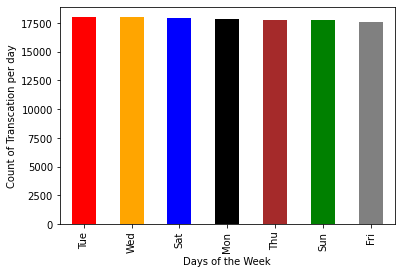

In [0]:
temp_df_2 = txn.toPandas() #changing to pandas dataframe


c= ["red","orange","blue","black","brown","green","grey","cyan"]
temp_df_2["day_name"].value_counts().plot(kind='bar',color=c)
plt.xlabel("Days of the Week")
plt.ylabel("Count of Transcation per day")

Above plot shows count of transactions for each day of the week is almost in the range of 17000 to 18000, with highest on Tuesdays and lowest on Fridays.

**3.Following the same logic as in section 1.2, generate the features that capture the count of transactions per client, year and day of the week. The intermediate MultiIndex dataframe (with nlevels=3) and the final pivoted output with a single index are shown in the snapshots below.**

In [0]:
annual_day_of_week_counts= txn.withColumn("cnt",concat(lit('cnt_'),col("YEAR"),lit('_'),col("day_name"))).drop('tran_amount').drop('txn_date').drop('ME_DT')
annual_day_of_week_counts = annual_day_of_week_counts.sort("customer_id","cnt")
annual_day_of_week_counts.show()

+-----------+----+---------------+--------+------------+
|customer_id|YEAR|day_of_the_week|day_name|         cnt|
+-----------+----+---------------+--------+------------+
|     CS1112|2011|              6|     Fri|cnt_2011_Fri|
|     CS1112|2011|              1|     Sun|cnt_2011_Sun|
|     CS1112|2011|              4|     Wed|cnt_2011_Wed|
|     CS1112|2012|              7|     Sat|cnt_2012_Sat|
|     CS1112|2012|              1|     Sun|cnt_2012_Sun|
|     CS1112|2012|              1|     Sun|cnt_2012_Sun|
|     CS1112|2012|              1|     Sun|cnt_2012_Sun|
|     CS1112|2012|              3|     Tue|cnt_2012_Tue|
|     CS1112|2013|              6|     Fri|cnt_2013_Fri|
|     CS1112|2013|              2|     Mon|cnt_2013_Mon|
|     CS1112|2013|              4|     Wed|cnt_2013_Wed|
|     CS1112|2014|              5|     Thu|cnt_2014_Thu|
|     CS1112|2014|              3|     Tue|cnt_2014_Tue|
|     CS1112|2014|              4|     Wed|cnt_2014_Wed|
|     CS1112|2015|             

In [0]:
annual_day_of_week_counts_pivot = annual_day_of_week_counts.groupby(["customer_id"]).pivot("cnt").agg(count("day_of_the_week")).drop("YEAR")
annual_day_of_week_counts_pivot = annual_day_of_week_counts_pivot.sort("customer_id")
annual_day_of_week_counts_pivot.show() #final table

+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|customer_id|cnt_2011_Fri|cnt_2011_Mon|cnt_2011_Sat|cnt_2011_Sun|cnt_2011_Thu|cnt_2011_Tue|cnt_2011_Wed|cnt_2012_Fri|cnt_2012_Mon|cnt_2012_Sat|cnt_2012_Sun|cnt_2012_Thu|cnt_2012_Tue|cnt_2012_Wed|cnt_2013_Fri|cnt_2013_Mon|cnt_2013_Sat|cnt_2013_Sun|cnt_2013_Thu|cnt_2013_Tue|cnt_2013_Wed|cnt_2014_Fri|cnt_2014_Mon|cnt_2014_Sat|cnt_2014_Sun|cnt_2014_Thu|cnt_2014_Tue|cnt_2014_Wed|cnt_2015_Fri|cnt_2015_Mon|cnt_2015_Sat|cnt_2015_Sun|cnt_2015_Thu|cnt_2015_Tue|cnt_2015_Wed|
+-----------+------------+------------+------------+----------

**4.Confirm that your output has the same number of rows as the final output in section 1.2 and save it as annual day of week counts pivot.xlsx. How many features/columns did you create in this section?**

In [0]:
print(f"Number of rows in pivot table of section 1.2 is {clnt_annual_aggregations_pivot.count()} ")
print(f"Number of rows in pivot table of annual day of week is {annual_day_of_week_counts_pivot.count()}")
print(f"Number of features created in pivot table of annual day of week is {len(annual_day_of_week_counts_pivot.columns)}")


#saving as excel sheet
annual_day_of_week_counts_pivot.write.csv("annual_day_of_week_counts_pivot_spark.csv")

Number of rows in pivot table of section 1.2 is 6889 
Number of rows in pivot table of annual day of week is 6889
Number of features created in pivot table of annual day of week is 36


From the above codes, we confirm that both the pivot table have same number of rows i.e. 6889. Additionaly, we created 35 features in this section(without counting the customer_id as feature).

**5. Similarly, generate the features that capture the count of transactions per client, month-end-date and day of the week. In contrast with the annual pivot table in the previous step, here you want to create the pivot with [’customer id’, ’ME DT’] as index to obtain the following output dataframe.**

In [0]:
monthly_day_of_week_counts= txn.withColumn("cnt",concat(lit('cnt_'),lit('_'),col("day_name"))).drop('tran_amount').drop('txn_date').drop('YEAR')
monthly_day_of_week_counts = monthly_day_of_week_counts.sort("customer_id","cnt")
monthly_day_of_week_counts.show()

+-----------+----------+---------------+--------+--------+
|customer_id|     ME_DT|day_of_the_week|day_name|     cnt|
+-----------+----------+---------------+--------+--------+
|     CS1112|2013-03-31|              6|     Fri|cnt__Fri|
|     CS1112|2011-08-31|              6|     Fri|cnt__Fri|
|     CS1112|2013-07-31|              2|     Mon|cnt__Mon|
|     CS1112|2012-12-31|              7|     Sat|cnt__Sat|
|     CS1112|2012-04-30|              1|     Sun|cnt__Sun|
|     CS1112|2011-10-31|              1|     Sun|cnt__Sun|
|     CS1112|2012-09-30|              1|     Sun|cnt__Sun|
|     CS1112|2012-06-30|              1|     Sun|cnt__Sun|
|     CS1112|2014-12-31|              5|     Thu|cnt__Thu|
|     CS1112|2014-04-30|              3|     Tue|cnt__Tue|
|     CS1112|2012-07-31|              3|     Tue|cnt__Tue|
|     CS1112|2015-01-31|              4|     Wed|cnt__Wed|
|     CS1112|2014-07-31|              4|     Wed|cnt__Wed|
|     CS1112|2013-11-30|              4|     Wed|cnt__We

In [0]:
monthly_day_of_week_counts_pivot = monthly_day_of_week_counts.groupby(["customer_id","ME_DT"]).pivot("cnt").agg(count("day_of_the_week"))
monthly_day_of_week_counts_pivot = monthly_day_of_week_counts_pivot.sort("customer_id","ME_DT")
monthly_day_of_week_counts_pivot=monthly_day_of_week_counts_pivot.na.fill(value=0) #imputing missing values with 0
monthly_day_of_week_counts_pivot.show() #final table

+-----------+----------+--------+--------+--------+--------+--------+--------+--------+
|customer_id|     ME_DT|cnt__Fri|cnt__Mon|cnt__Sat|cnt__Sun|cnt__Thu|cnt__Tue|cnt__Wed|
+-----------+----------+--------+--------+--------+--------+--------+--------+--------+
|     CS1112|2011-06-30|       0|       0|       0|       0|       0|       0|       1|
|     CS1112|2011-08-31|       1|       0|       0|       0|       0|       0|       0|
|     CS1112|2011-10-31|       0|       0|       0|       1|       0|       0|       0|
|     CS1112|2012-04-30|       0|       0|       0|       1|       0|       0|       0|
|     CS1112|2012-06-30|       0|       0|       0|       1|       0|       0|       0|
|     CS1112|2012-07-31|       0|       0|       0|       0|       0|       1|       0|
|     CS1112|2012-09-30|       0|       0|       0|       1|       0|       0|       0|
|     CS1112|2012-12-31|       0|       0|       1|       0|       0|       0|       0|
|     CS1112|2013-03-31|       1

**6. Join with base table pd as you did in section 1.5 and impute with your choice of value for NaN. Save the final output as mth day counts.xlxs.**

In [0]:
#renaming customer id column for monthly table
monthly_day_of_week_counts_pivot = monthly_day_of_week_counts_pivot .withColumnRenamed("customer_id","CLNT_NO")
#left outer join
mth_day_counts = base_table_pd.join(monthly_day_of_week_counts_pivot, ["CLNT_NO","ME_DT"], "left_outer")
mth_day_counts.show()

+-------+----------+--------+--------+--------+--------+--------+--------+--------+
|CLNT_NO|     ME_DT|cnt__Fri|cnt__Mon|cnt__Sat|cnt__Sun|cnt__Thu|cnt__Tue|cnt__Wed|
+-------+----------+--------+--------+--------+--------+--------+--------+--------+
| CS6043|2013-03-31|    null|    null|    null|    null|    null|    null|    null|
| CS4147|2013-03-31|       0|       0|       0|       1|       0|       0|       0|
| CS5539|2013-03-31|    null|    null|    null|    null|    null|    null|    null|
| CS1217|2013-03-31|    null|    null|    null|    null|    null|    null|    null|
| CS1171|2013-03-31|    null|    null|    null|    null|    null|    null|    null|
| CS2724|2013-03-31|    null|    null|    null|    null|    null|    null|    null|
| CS3802|2013-03-31|    null|    null|    null|    null|    null|    null|    null|
| CS3780|2013-03-31|       0|       1|       0|       0|       0|       0|       0|
| CS5902|2013-03-31|       0|       0|       0|       1|       0|       0|  

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/databricks/python/

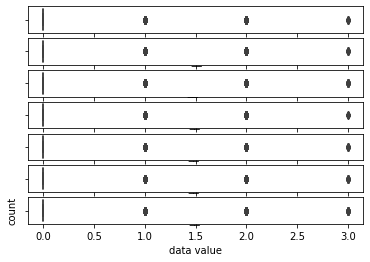

In [0]:
temp_df_3 = mth_day_counts.toPandas() #converting to pandas dataframe to plot using seaborn

fig6, (ax6,ax7,ax8, ax9,ax10, ax11,ax12) = plt.subplots(7)
sns.boxplot(temp_df_3["cnt__Fri"],ax=ax6)
sns.boxplot(temp_df_3["cnt__Mon"],ax=ax7)
sns.boxplot(temp_df_3["cnt__Sat"],ax=ax8)
sns.boxplot(temp_df_3["cnt__Sun"],ax=ax9)
sns.boxplot(temp_df_3["cnt__Thu"],ax=ax10)
sns.boxplot(temp_df_3["cnt__Tue"],ax=ax11)
sns.boxplot(temp_df_3["cnt__Wed"],ax=ax12)
plt.xlabel("data value")
plt.ylabel("count")

In [0]:
#Since there are outliers for every column of the data, we will go with median imputation to mitigate the effect of outliers.

#Imputing missing values with median of the column values
imputecols2 = ["cnt__Fri","cnt__Mon","cnt__Sat","cnt__Sun","cnt__Thu","cnt__Tue","cnt__Wed"]
imputer2 = Imputer(
    inputCols=imputecols2, 
    outputCols=["{}_imputed".format(c) for c in imputecols2]
    ).setStrategy("median")

mth_day_counts = imputer2.fit(mth_day_counts).transform(mth_day_counts)
mth_day_counts.show()

#saving to csv file
mth_day_counts.write.csv('mth_day_counts_spark.csv')


+-------+----------+--------+--------+--------+--------+--------+--------+--------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|CLNT_NO|     ME_DT|cnt__Fri|cnt__Mon|cnt__Sat|cnt__Sun|cnt__Thu|cnt__Tue|cnt__Wed|cnt__Fri_imputed|cnt__Mon_imputed|cnt__Sat_imputed|cnt__Sun_imputed|cnt__Thu_imputed|cnt__Tue_imputed|cnt__Wed_imputed|
+-------+----------+--------+--------+--------+--------+--------+--------+--------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
| CS6043|2013-03-31|    null|    null|    null|    null|    null|    null|    null|               0|               0|               0|               0|               0|               0|               0|
| CS4147|2013-03-31|       0|       0|       0|       1|       0|       0|       0|               0|               0|               0|               1|               0|               0|   

### 1.7 Date-related features: days since last transaction

**1.The starting point is again the txn table. Recall that most clients have a single purchase per month, but some clients have multiple purchases in a month. Since you want to calculate the ”days since last transaction”, you want to capture the last transaction in a month for every client.\
Use the appropriate groupby to create the table last monthly purchase that cap- tures the last ’txn date’ (aggfunc=max) for every client and month.**

In [0]:
last_monthly_purchase = txn.groupby(["customer_id","ME_DT"]).agg(max("txn_date").alias("last_monthly_purchase"))
last_monthly_purchase = last_monthly_purchase.sort("customer_id","ME_DT")
last_monthly_purchase.show()

+-----------+----------+---------------------+
|customer_id|     ME_DT|last_monthly_purchase|
+-----------+----------+---------------------+
|     CS1112|2011-06-30|  2011-06-15 00:00:00|
|     CS1112|2011-08-31|  2011-08-19 00:00:00|
|     CS1112|2011-10-31|  2011-10-02 00:00:00|
|     CS1112|2012-04-30|  2012-04-08 00:00:00|
|     CS1112|2012-06-30|  2012-06-24 00:00:00|
|     CS1112|2012-07-31|  2012-07-03 00:00:00|
|     CS1112|2012-09-30|  2012-09-16 00:00:00|
|     CS1112|2012-12-31|  2012-12-15 00:00:00|
|     CS1112|2013-03-31|  2013-03-01 00:00:00|
|     CS1112|2013-07-31|  2013-07-01 00:00:00|
|     CS1112|2013-11-30|  2013-11-13 00:00:00|
|     CS1112|2014-04-30|  2014-04-29 00:00:00|
|     CS1112|2014-07-31|  2014-07-16 00:00:00|
|     CS1112|2014-12-31|  2014-12-04 00:00:00|
|     CS1112|2015-01-31|  2015-01-14 00:00:00|
|     CS1113|2011-05-31|  2011-05-27 00:00:00|
|     CS1113|2011-07-31|  2011-07-25 00:00:00|
|     CS1113|2011-10-31|  2011-10-23 00:00:00|
|     CS1113|

**2.Join base table pd with last monthly purchase as you did in section 1.5. The snapshot below shows the output of the created object last monthly purchase base for client CS1112 who made her/his first purchase on June 2011, then no purchase on July and made a purchase again on August 2011. What values will you use to impute the NaT values here? NaT stands for ”Not a Timestamp”.**

In [0]:
#renaming cuatomer id column 
last_monthly_purchase = last_monthly_purchase.withColumnRenamed("customer_id","CLNT_NO")
#left outer join
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase, ["CLNT_NO","ME_DT"], "left_outer")
last_monthly_purchase_base.show()

+-------+----------+---------------------+
|CLNT_NO|     ME_DT|last_monthly_purchase|
+-------+----------+---------------------+
| CS6043|2013-03-31|                 null|
| CS4147|2013-03-31|  2013-03-10 00:00:00|
| CS5539|2013-03-31|                 null|
| CS1217|2013-03-31|                 null|
| CS1171|2013-03-31|                 null|
| CS2724|2013-03-31|                 null|
| CS3802|2013-03-31|                 null|
| CS3780|2013-03-31|  2013-03-25 00:00:00|
| CS5902|2013-03-31|  2013-03-31 00:00:00|
| CS3494|2013-03-31|                 null|
| CS1850|2013-03-31|  2013-03-05 00:00:00|
| CS5552|2013-03-31|                 null|
| CS4655|2013-03-31|                 null|
| CS4768|2013-03-31|  2013-03-25 00:00:00|
| CS2892|2013-03-31|                 null|
| CS3904|2013-03-31|                 null|
| CS5295|2013-03-31|  2013-03-22 00:00:00|
| CS6040|2013-03-31|  2013-03-31 00:00:00|
| CS2086|2013-03-31|  2013-03-05 00:00:00|
| CS4102|2013-03-31|                 null|
+-------+--

In this case imputing NaT values with mean, median or mode won't be accurate. A NaT value for a month means there was no purchase that month by the client. So for each client, the previous month purchase would be the last monthly purchase for the current month.


**3. To answer the imputation problem, we have to think what value should we use for say July 2011 for ’last monthly purchase’? The answer is that in July the value for the last monthly purchase is the previous line value: 2011-06-15. In other words, for every client we want to forward-fill the NaT values.
While pandas fillna() method has a method to forward-fill, here we want to use the apply and a lambda function with the forward-fill function ffill(), with the follow- ing expression: .apply(lambda x: x.ffill()) applied on object last monthly - purchase base grouped by CLNT NO. Below, I am showing a snapshot for lines [92:98] that confirm the transition between clients CS1113 and CS1114.
You can also recreate the forward-fill with the fillna() method, however there is a disadvantage and a reason the .apply() method is preferred here.
The forward-fill on the grouped by CLNT NO object is expected to leave NaT values for the first months of every client until they purchase something. The above snapshot confirms that for client CS1114.**

In [0]:
window = (Window.partitionBy('CLNT_NO').orderBy('ME_DT').rowsBetween(Window.unboundedPreceding, Window.currentRow))
last_monthly_purchase_base = (last_monthly_purchase_base.withColumn('last_monthly_purchase', F.last('last_monthly_purchase', ignorenulls=True).over(window)))
last_monthly_purchase_base.show()

+-------+----------+---------------------+
|CLNT_NO|     ME_DT|last_monthly_purchase|
+-------+----------+---------------------+
| CS1112|2011-05-31|                 null|
| CS1112|2011-06-30|  2011-06-15 00:00:00|
| CS1112|2011-07-31|  2011-06-15 00:00:00|
| CS1112|2011-08-31|  2011-08-19 00:00:00|
| CS1112|2011-09-30|  2011-08-19 00:00:00|
| CS1112|2011-10-31|  2011-10-02 00:00:00|
| CS1112|2011-11-30|  2011-10-02 00:00:00|
| CS1112|2011-12-31|  2011-10-02 00:00:00|
| CS1112|2012-01-31|  2011-10-02 00:00:00|
| CS1112|2012-02-29|  2011-10-02 00:00:00|
| CS1112|2012-03-31|  2011-10-02 00:00:00|
| CS1112|2012-04-30|  2012-04-08 00:00:00|
| CS1112|2012-05-31|  2012-04-08 00:00:00|
| CS1112|2012-06-30|  2012-06-24 00:00:00|
| CS1112|2012-07-31|  2012-07-03 00:00:00|
| CS1112|2012-08-31|  2012-07-03 00:00:00|
| CS1112|2012-09-30|  2012-09-16 00:00:00|
| CS1112|2012-10-31|  2012-09-16 00:00:00|
| CS1112|2012-11-30|  2012-09-16 00:00:00|
| CS1112|2012-12-31|  2012-12-15 00:00:00|
+-------+--

**4.Subtract the two date columns and convert the output to .dt.days to calculate the column ’days since last txn’ as shown in the following snapshot.**

In [0]:
last_monthly_purchase_base = last_monthly_purchase_base.withColumn("days_since_last_txn", datediff(col("ME_DT"), col("last_monthly_purchase")))
last_monthly_purchase_base.show()

+-------+----------+---------------------+-------------------+
|CLNT_NO|     ME_DT|last_monthly_purchase|days_since_last_txn|
+-------+----------+---------------------+-------------------+
| CS1112|2011-05-31|                 null|               null|
| CS1112|2011-06-30|  2011-06-15 00:00:00|                 15|
| CS1112|2011-07-31|  2011-06-15 00:00:00|                 46|
| CS1112|2011-08-31|  2011-08-19 00:00:00|                 12|
| CS1112|2011-09-30|  2011-08-19 00:00:00|                 42|
| CS1112|2011-10-31|  2011-10-02 00:00:00|                 29|
| CS1112|2011-11-30|  2011-10-02 00:00:00|                 59|
| CS1112|2011-12-31|  2011-10-02 00:00:00|                 90|
| CS1112|2012-01-31|  2011-10-02 00:00:00|                121|
| CS1112|2012-02-29|  2011-10-02 00:00:00|                150|
| CS1112|2012-03-31|  2011-10-02 00:00:00|                181|
| CS1112|2012-04-30|  2012-04-08 00:00:00|                 22|
| CS1112|2012-05-31|  2012-04-08 00:00:00|             

**5.Plot a histogram of the ’days since last txn’. Based on the values you observe in the histogram, impute the remaining NaN values (i.e. for the initial months before a client makes a purchase). Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as days since last txn.xlsx.**

Out[489]: Text(0.5, 1.0, 'Plot showing distribution of days since last transcation')

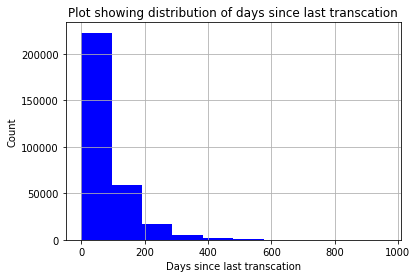

In [0]:
temp_df_4 = last_monthly_purchase_base.toPandas() #converted to pandas dataframe to plot using matplotlib library

ax13 = temp_df_4['days_since_last_txn'].hist(color='blue')
ax13.set_xlabel("Days since last transcation")
ax13.set_ylabel("Count")
ax13.set_title("Plot showing distribution of days since last transcation")

Ideally for a time data series , forward fill is a good choice for imputation. But since we have no data in the first month entry for few clients, we see the nature of the data. Since the data looks skewed again, ideally we should go with the median imputation. But that will mislead us. That is because it will show a higher amount of days since last transcation and an arbitary median date for last monthly purchase. These values may not be relevant. So in this case, considering the missing values as absence of value seems more logical. So i'll go with 0 values.

In [0]:
last_monthly_purchase_base.na.fill(value=0,subset=["last_monthly_purchase"]) #imputing missing values with 0
last_monthly_purchase_base.show()

#saving as csv file
last_monthly_purchase_base.write.csv("days_since_last_txn.csv")


+-------+----------+---------------------+-------------------+
|CLNT_NO|     ME_DT|last_monthly_purchase|days_since_last_txn|
+-------+----------+---------------------+-------------------+
| CS1112|2011-05-31|                 null|               null|
| CS1112|2011-06-30|  2011-06-15 00:00:00|                 15|
| CS1112|2011-07-31|  2011-06-15 00:00:00|                 46|
| CS1112|2011-08-31|  2011-08-19 00:00:00|                 12|
| CS1112|2011-09-30|  2011-08-19 00:00:00|                 42|
| CS1112|2011-10-31|  2011-10-02 00:00:00|                 29|
| CS1112|2011-11-30|  2011-10-02 00:00:00|                 59|
| CS1112|2011-12-31|  2011-10-02 00:00:00|                 90|
| CS1112|2012-01-31|  2011-10-02 00:00:00|                121|
| CS1112|2012-02-29|  2011-10-02 00:00:00|                150|
| CS1112|2012-03-31|  2011-10-02 00:00:00|                181|
| CS1112|2012-04-30|  2012-04-08 00:00:00|                 22|
| CS1112|2012-05-31|  2012-04-08 00:00:00|             

Please note above that the null value under "last_monthly_purchase" is not integer and is a date type object for which spark fill.na function did not replace it with 0.